# Day 6: Lanternfish

## First part

In [1]:
from dataclasses import dataclass

In [2]:
def load_data(filename):
    with open(filename) as f:
        for item in f.read().strip().split(','):
            yield int(item)

In [3]:
assert list(load_data('06-sample.txt')) == [3,4,3,1,2]

In [4]:
@dataclass
class LanternFish:
    counter: int
        
    def tick(self):
        result = None
        self.counter -= 1
        if self.counter < 0:
            result = LanternFish(8)
            self.counter = 6
        return result
    
    def __repr__(self):
        return str(self.counter)


In [5]:
def tick_all(sample):
    for fish in sample[:]:
        new_fish = fish.tick()
        if new_fish:
            sample.append(new_fish)
    return sample

In [6]:
sample = [LanternFish(n) for n in load_data('06-sample.txt')]
for days in range(18):
    sample = tick_all(sample)
assert len(sample) == 26

In [7]:
sample = [LanternFish(n) for n in load_data('06-sample.txt')]
for days in range(80):
    sample = tick_all(sample)
assert len(sample) == 5934

### Solution part 1

In [8]:
sample = [LanternFish(n) for n in load_data('06-input.txt')]
for days in range(80):
    sample = tick_all(sample)
sol = len(sample)
print(f"First part: {sol}")

First part: 388419


## Second part

In [9]:
from collections import Counter

In [10]:
def create_sample(filename):
    sample = Counter({index: 0 for index in range(9)})
    for num in load_data(filename):
        sample[num] += 1
    return sample

def next_gen(sample):
    new_fishes = sample[0]
    for index in range(9):
        sample[index] = sample[index+1]
    sample[6] += new_fishes
    sample[8] = new_fishes
    return sample

def print_sample(sample, day):
    print(f"--[{day}]-------------------------")
    for index in range(9):
        print(str(sample[index]) if sample[index] > 0 else '.', end=" ")
    print()
 
sample = create_sample('06-sample.txt')
for day in range(4):
    print_sample(sample, day)
    sample = next_gen(sample)
print_sample(sample, day)

--[0]-------------------------
. 1 1 2 1 . . . . 
--[1]-------------------------
1 1 2 1 . . . . . 
--[2]-------------------------
1 2 1 . . . 1 . 1 
--[3]-------------------------
2 1 . . . 1 1 1 1 
--[3]-------------------------
1 . . . 1 1 3 1 2 


In [11]:
sample = create_sample('06-sample.txt')    
for day in range(18):
    sample = next_gen(sample)
total = sum(sample[k] for k in sample)
assert total == 26

In [12]:
sample = create_sample('06-sample.txt')
for day in range(80):
    sample = next_gen(sample)
total = sum(sample[k] for k in sample)
assert total == 5934

### Second part solution

In [13]:
sample = create_sample('06-input.txt')
for day in range(256):
    sample = next_gen(sample)
total = sum(sample[k] for k in sample)
print(f"Second part: {total}")

Second part: 1740449478328


## Extra

Suppose the lanternfish live forever and have unlimited food and space. Would they take over the entire ocean?

Answer: Yes. And very quickly.

In [14]:
data = []
for days in range(256):
    sample = create_sample('06-input.txt')
    for day in range(days):
        sample = next_gen(sample)
    total = sum(sample[k] for k in sample)
    data.append(total)


In [15]:
%matplotlib inline
from matplotlib import pyplot as plt

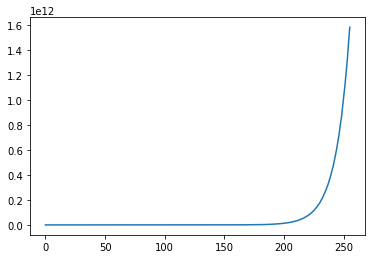

In [16]:
plt.plot(list(range(256)), data)
plt.show()